# Import important libraries 


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
pd.set_option("display.max_columns", None)

# Load data


In [2]:
df = pd.read_csv('liver_cirrhosis.csv')
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [3]:
df['Age'] = (df['Age'] / 365).astype('int')
df['N_Years'] = (df['N_Days'] / 365).astype('int')
df.drop('N_Days',axis=1,inplace=True)
df.head()

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N_Years
0,C,Placebo,50,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,6
1,C,Placebo,54,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2,3
2,C,Placebo,32,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,11
3,D,Placebo,45,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2,5
4,D,Placebo,59,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1,5


# Data visualization

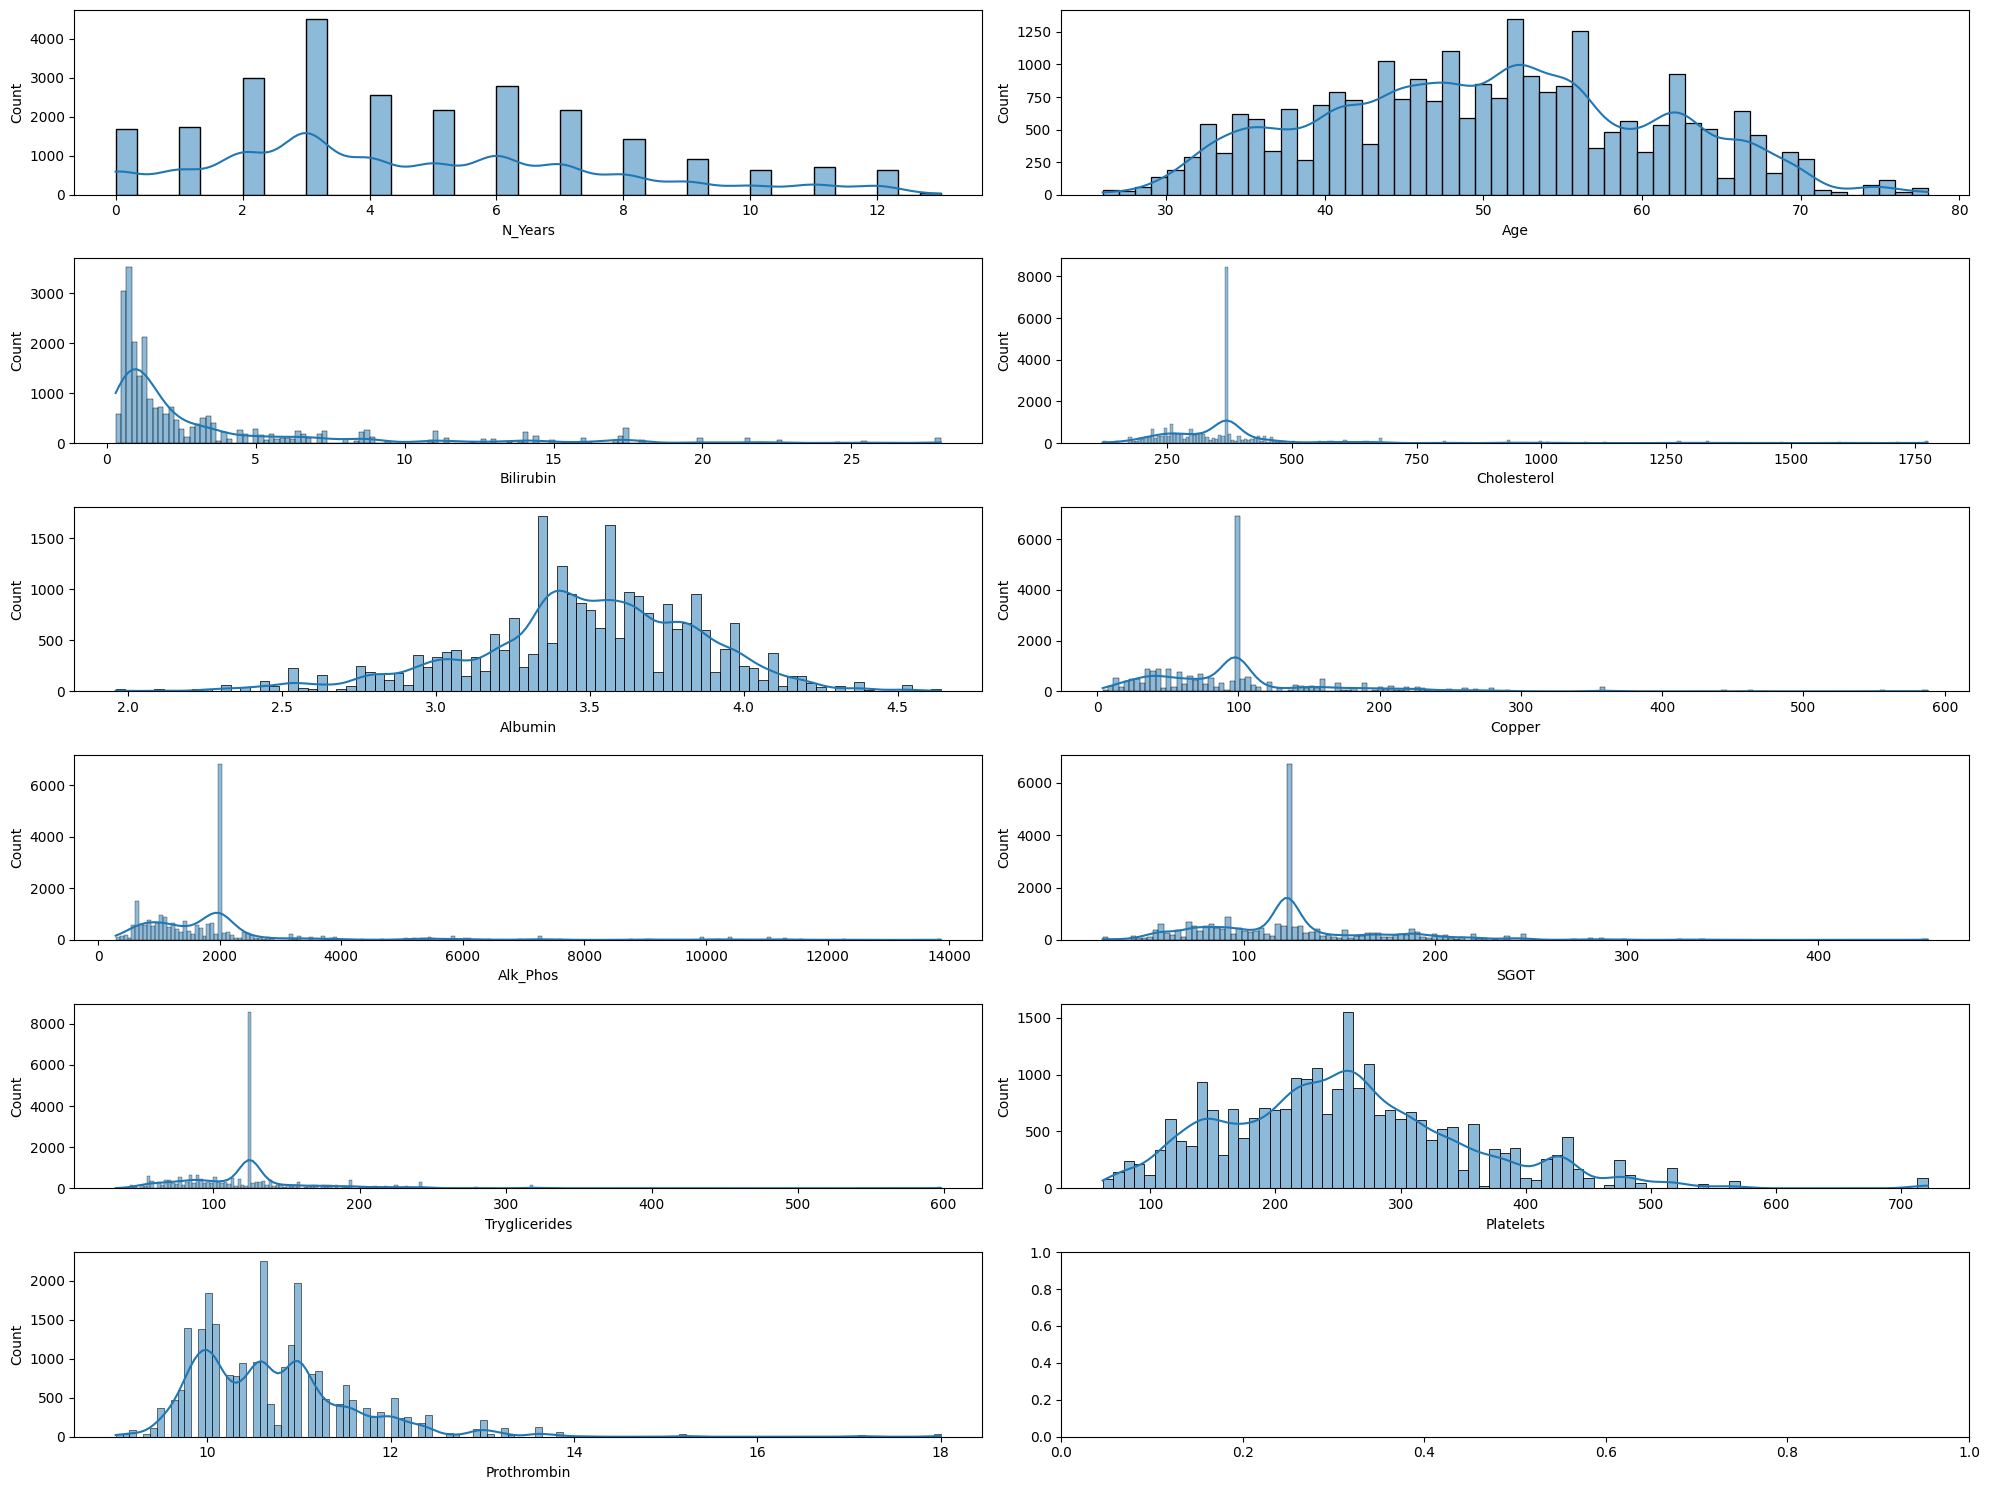

In [4]:
numeric_cols=['N_Years','Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 15))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col],kde=True ,ax=axes[i])
plt.tight_layout()

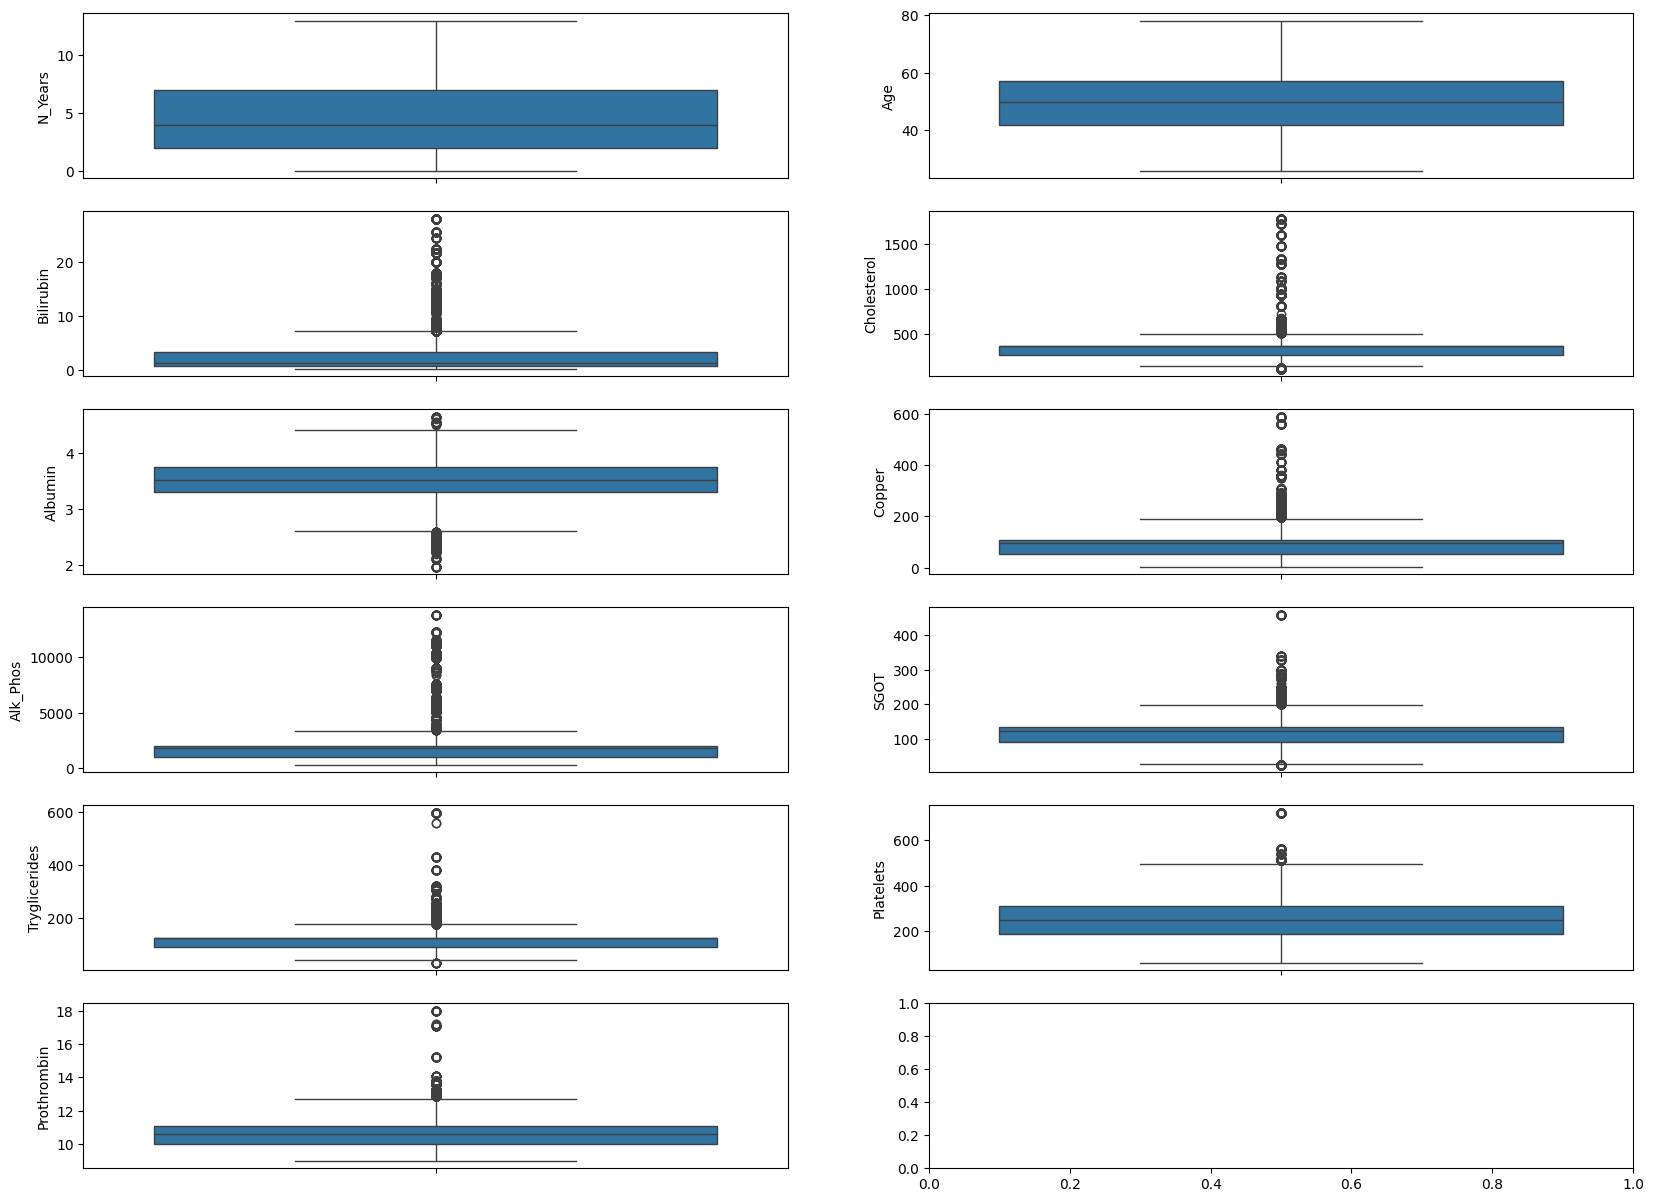

In [5]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 15))
axes= axes.flatten()
for i,col in enumerate(numeric_cols):
    sns.boxplot(df[col],ax=axes[i])

# Data Preprocessing 

## Removing Outliers 

In [6]:
for _ in range(4):
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
df.reset_index(drop=True, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11702 entries, 0 to 11701
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Status         11702 non-null  object 
 1   Drug           11702 non-null  object 
 2   Age            11702 non-null  int64  
 3   Sex            11702 non-null  object 
 4   Ascites        11702 non-null  object 
 5   Hepatomegaly   11702 non-null  object 
 6   Spiders        11702 non-null  object 
 7   Edema          11702 non-null  object 
 8   Bilirubin      11702 non-null  float64
 9   Cholesterol    11702 non-null  float64
 10  Albumin        11702 non-null  float64
 11  Copper         11702 non-null  float64
 12  Alk_Phos       11702 non-null  float64
 13  SGOT           11702 non-null  float64
 14  Tryglicerides  11702 non-null  float64
 15  Platelets      11702 non-null  float64
 16  Prothrombin    11702 non-null  float64
 17  Stage          11702 non-null  int64  
 18  N_Year

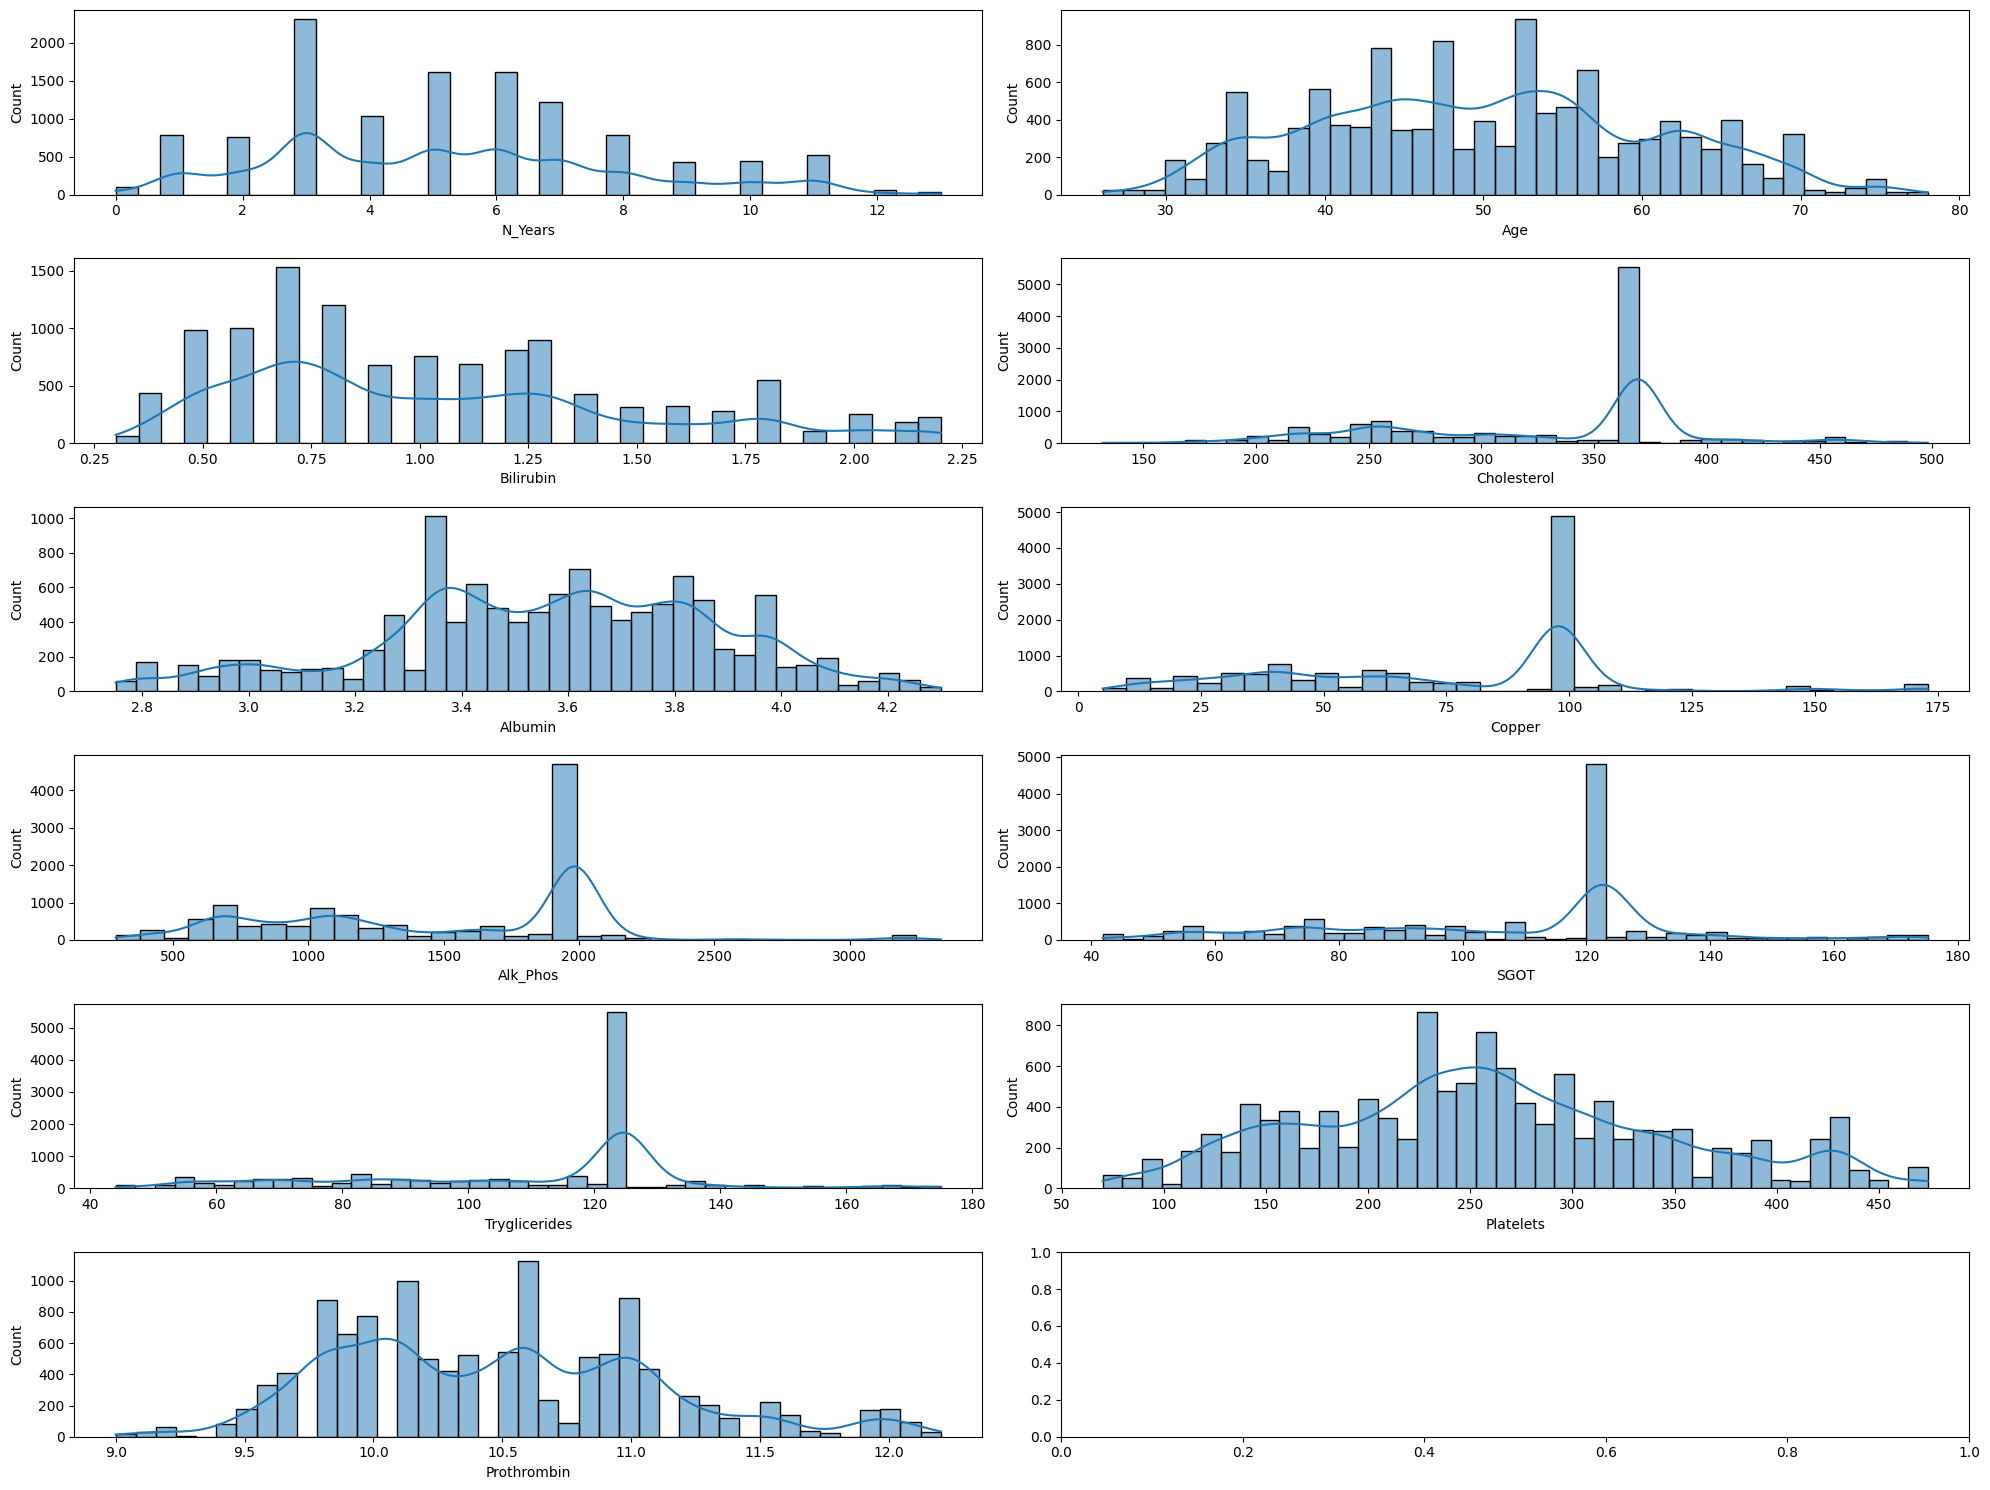

In [7]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 15))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True,ax=axes[i])
plt.tight_layout()

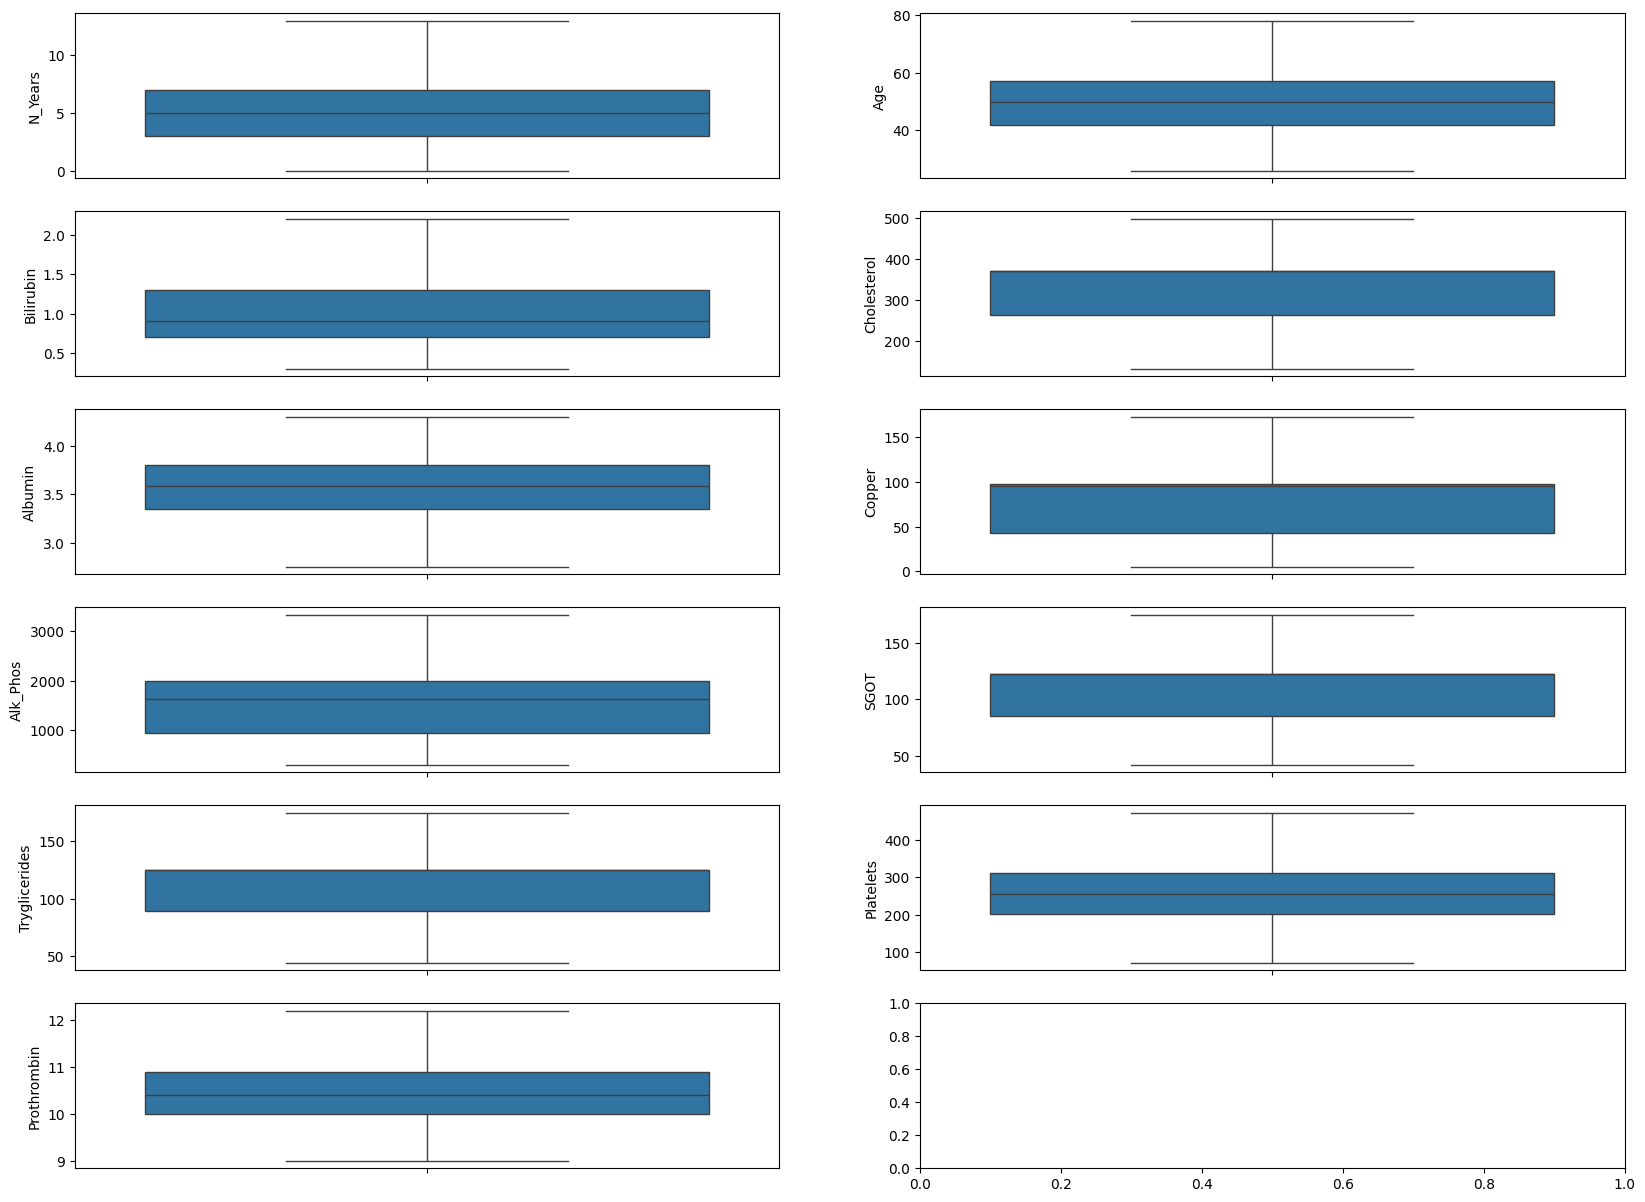

In [8]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 15))
axes= axes.flatten()
for i,col in enumerate(numeric_cols):
    sns.boxplot(df[col],ax=axes[i])

## One Hot Encoding

In [9]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N_Years,Status_CL,Status_D,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
0,54,0.5,219.000000,3.93,22.000000,663.000000,45.000000,75.000000,220.0,10.8,2,3,False,False,True,True,True,False,True,False,False
1,32,0.5,320.000000,3.54,51.000000,1243.000000,122.450000,80.000000,225.0,10.0,2,11,False,False,True,False,False,False,False,False,False
2,45,0.7,255.000000,3.74,23.000000,1024.000000,77.500000,58.000000,151.0,10.2,2,5,False,True,True,False,False,False,False,False,False
3,59,1.9,486.000000,3.54,74.000000,1052.000000,108.500000,109.000000,151.0,11.5,1,5,False,True,True,False,False,True,False,False,False
4,69,0.7,369.510563,3.06,97.648387,1982.655769,122.556346,124.702128,165.0,10.0,3,4,False,False,True,False,True,False,True,False,False


## Scaling 

In [10]:
scaler = StandardScaler()
for col in numeric_cols:
    df[col] = scaler.fit_transform(df[[col]])

In [11]:
df.head()

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N_Years,Status_CL,Status_D,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
0,0.372449,-1.170681,-1.617697,1.173448,-1.508807,-1.392189,-2.191257,-1.271584,-0.439186,0.519825,2,-0.813922,False,False,True,True,True,False,True,False,False
1,-1.714950,-1.170681,-0.098270,-0.069487,-0.671457,-0.392321,0.555766,-1.083232,-0.381986,-0.765506,2,2.130058,False,False,True,False,False,False,False,False,False
2,-0.481487,-0.739390,-1.076119,0.567916,-1.479933,-0.769857,-1.038536,-1.911983,-1.228544,-0.444173,2,-0.077927,False,True,True,False,False,False,False,False,False
3,0.846858,1.848355,2.399006,-0.069487,-0.007352,-0.721588,0.060983,0.009214,-1.228544,1.644489,1,-0.077927,False,True,True,False,False,True,False,False,False
4,1.795675,-0.739390,0.646559,-1.599253,0.675475,0.882780,0.559538,0.600722,-1.068384,-0.765506,3,-0.445924,False,False,True,False,True,False,True,False,False


# Splitting the data

In [12]:
X = df.drop('Stage',axis=1)
y= df['Stage']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# Random Forest Classifier

In [13]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [14]:
y_pred=rf.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9457496796240923
              precision    recall  f1-score   support

           1       0.94      0.95      0.95       897
           2       0.94      0.94      0.94       860
           3       0.95      0.96      0.95       584

    accuracy                           0.95      2341
   macro avg       0.95      0.95      0.95      2341
weighted avg       0.95      0.95      0.95      2341



# Support Vector Machine 

In [15]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

SVC()

In [16]:
y_pred= svc.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.8547629218282785
              precision    recall  f1-score   support

           1       0.83      0.87      0.85       868
           2       0.87      0.82      0.84       901
           3       0.87      0.90      0.88       572

    accuracy                           0.85      2341
   macro avg       0.86      0.86      0.86      2341
weighted avg       0.86      0.85      0.85      2341



# XGB Classifier

In [17]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train-1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [18]:
y_pred=xgb.predict(X_test)
print(accuracy_score(y_pred,y_test-1))
print(classification_report(y_pred,y_test-1))

0.9542930371636053
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       903
           1       0.95      0.95      0.95       854
           2       0.96      0.97      0.96       584

    accuracy                           0.95      2341
   macro avg       0.95      0.96      0.96      2341
weighted avg       0.95      0.95      0.95      2341



# XGBClassifier with GridSearchCV 

In [ ]:
params_grid={
    'n_estimators':[100,200,300],
    'max_depth':[3,5,7],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
}
xgb = XGBClassifier()
grid_search = GridSearchCV(estimator=xgb, param_grid=params_grid ,scoring='accuracy' ,cv=5 ,n_jobs=-1 ,verbose=1)
grid_search.fit(X_train,y_train-1)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\ziyad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
262 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ziyad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ziyad\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
  File "c:\Users\ziyad\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py", l

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [20]:
grid_search.best_score_

np.float64(0.9469069571645653)

In [21]:
grid_search.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}